# Exploration and cleaning of raw dataset

[Dataset Source (Kaggle)](https://www.kaggle.com/datasets/deepu1109/star-dataset/discussion?sort=undefined)

### Dataset info (taken from kaggle):
This is a dataset consisting of several features of stars.

Some of them are:

- Absolute Temperature (in K)
- Relative Luminosity (L/Lo)
- Relative Radius (R/Ro)
- Absolute Magnitude (Mv)
- Star Color (white,Red, Blue, Yellow, yellow-orange, etc.)
- Spectral Class (O, B, A, F, G, K, M)
- Star Type (Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence, SuperGiants, HyperGiants)

- Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)
- Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

### Goal of this notebook:
This notebook focuses on exploring and cleaning of the raw star dataset.
The primary aim is to:

- Gain deeper understanding how spectral class relates to Absolute temperature, absolute magnitude, relative luminosity and relative radius.
- Prepare clean dataset for later use in machine learning models and star generation



In [3]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [4]:
#Loading dataset and making sure it is loaded correctly.
dataset = pd.read_csv("../Data/raw/star_dataset.csv")
dataset

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


There is no null vaues in the dataset and it cointains 5 numerical and one object type

In [6]:
dataset.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [7]:
dataset['Star Type'] = dataset['Star type'].map({0:'Brown Dwarf', 1:'Red Dwarf', 2:'White Dwarf', 3:"Main Sequence", 4:"Supergiant", 5:"Hypergiant"})
dataset["Star Type"].value_counts()

Star Type
Brown Dwarf      40
Red Dwarf        40
White Dwarf      40
Main Sequence    40
Supergiant       40
Hypergiant       40
Name: count, dtype: int64

In [8]:
dataset["Spectral Class"].value_counts()

Spectral Class
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: count, dtype: int64

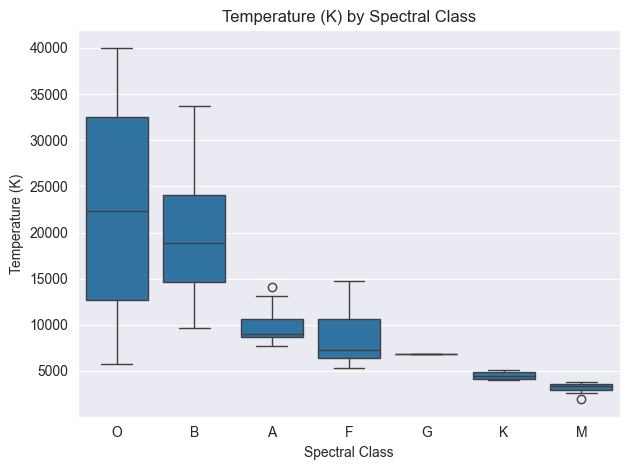

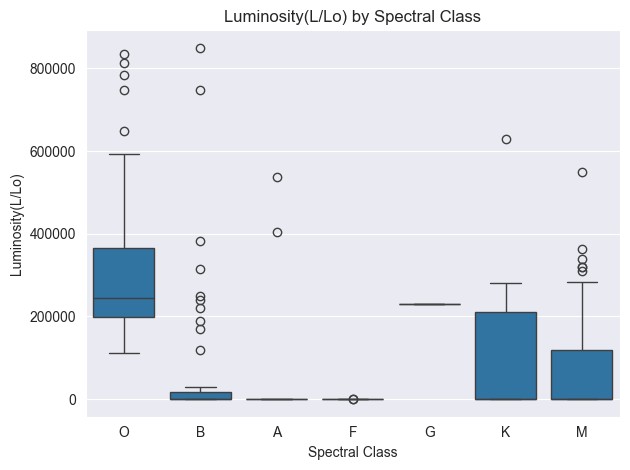

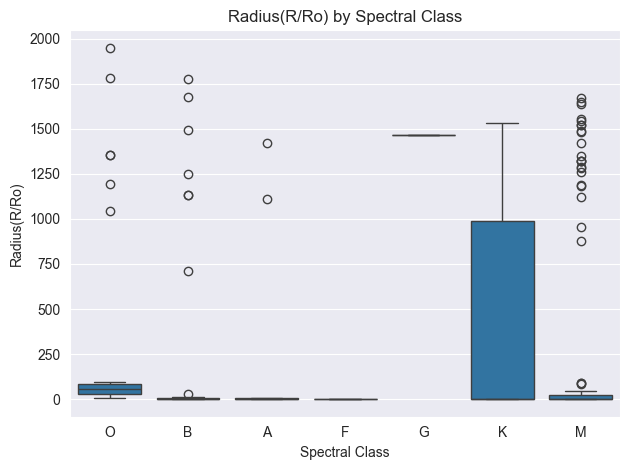

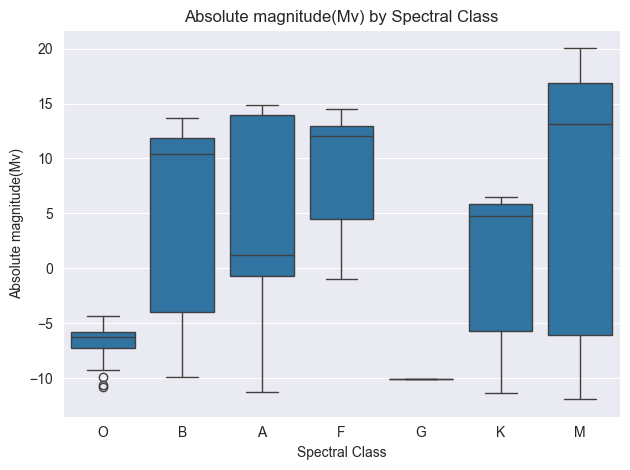

In [9]:
features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']

for feature in features:
    plt.figure()
    sns.boxplot(x="Spectral Class", y=feature, data=dataset, order=["O", "B", "A", "F", "G", "K", "M"])
    plt.title(f'{feature} by Spectral Class')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

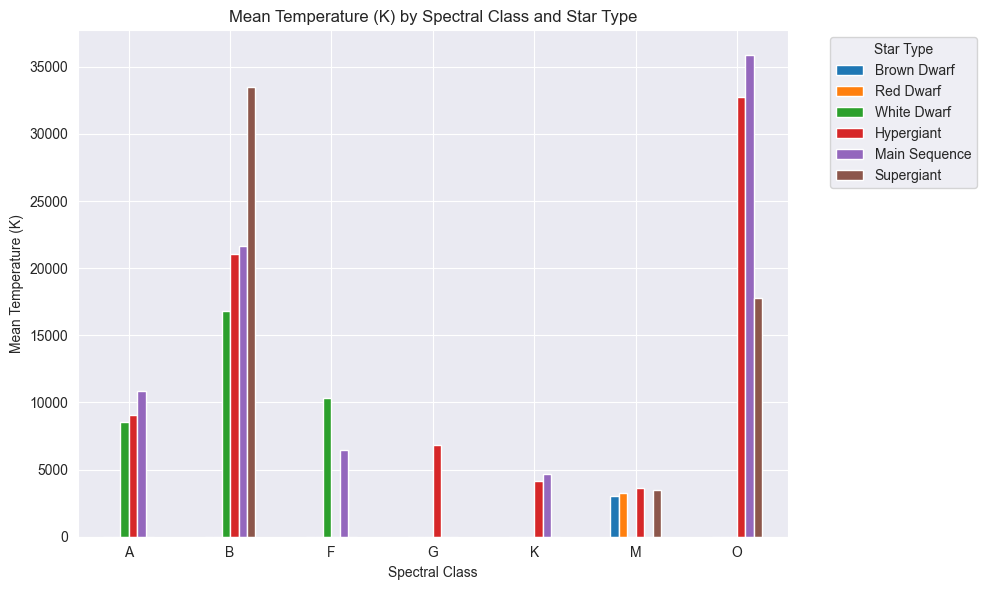

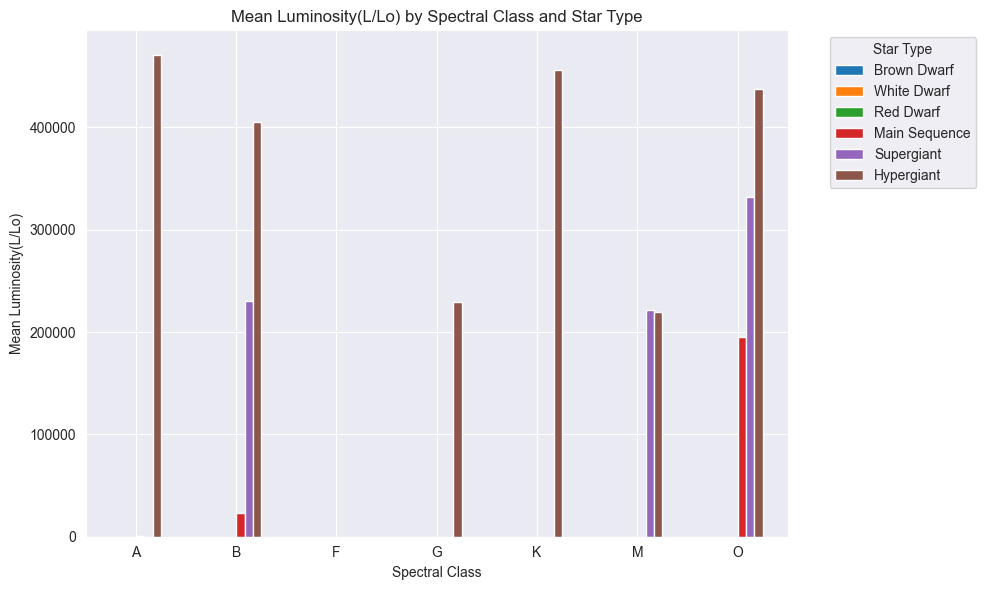

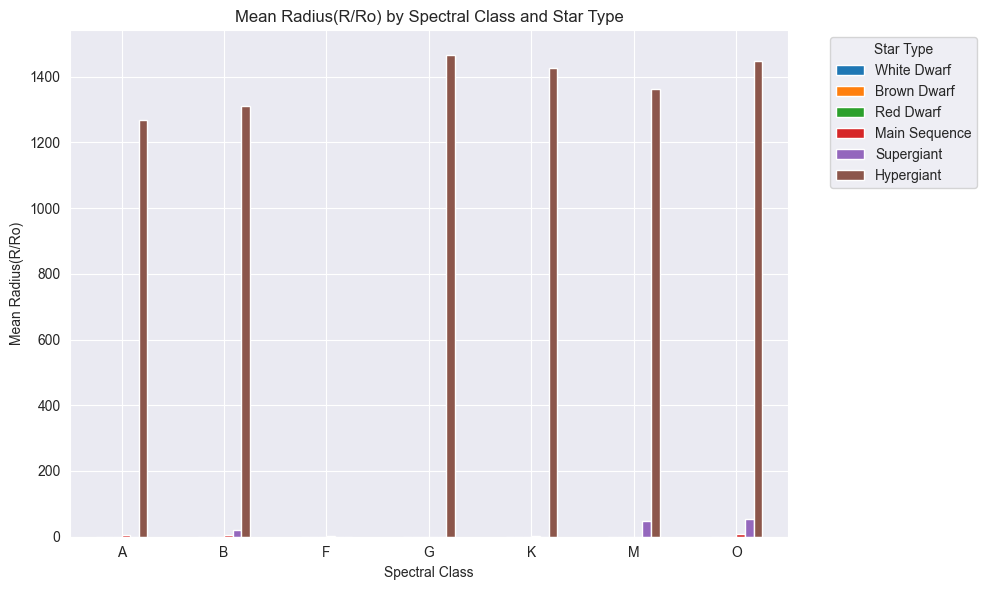

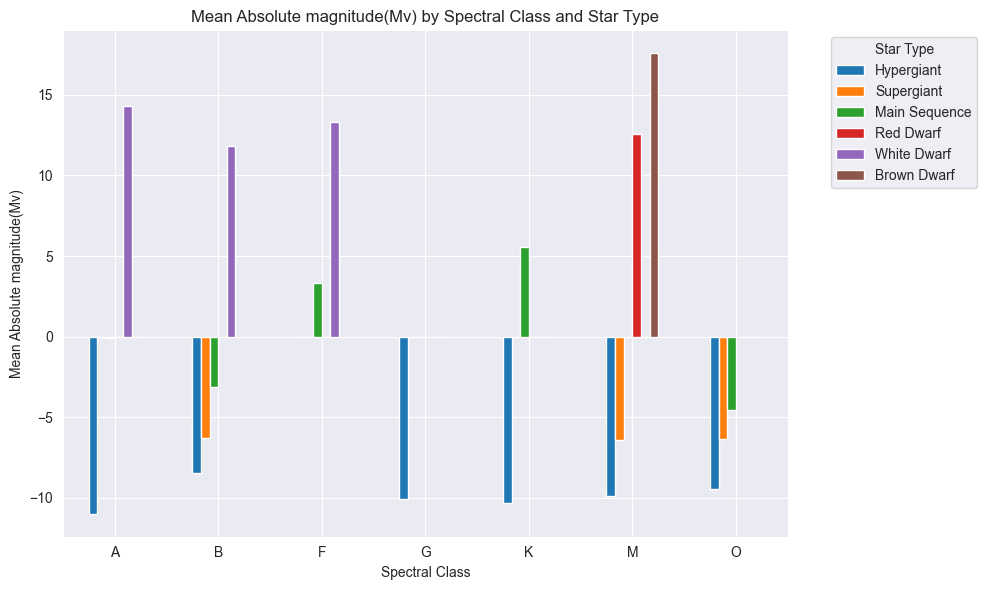

In [10]:
for feature in features:
    pivot = dataset.pivot_table(
        index='Spectral Class',
        columns='Star Type',
        values=feature,
        aggfunc='mean'
    )
    col_order = pivot.mean(axis=0).sort_values().index
    pivot = pivot[col_order]

    pivot.plot.bar(rot=0, figsize=(10,6))
    plt.title(f'Mean {feature} by Spectral Class and Star Type')
    plt.ylabel(f'Mean {feature}')
    plt.xlabel('Spectral Class')
    plt.legend(title='Star Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

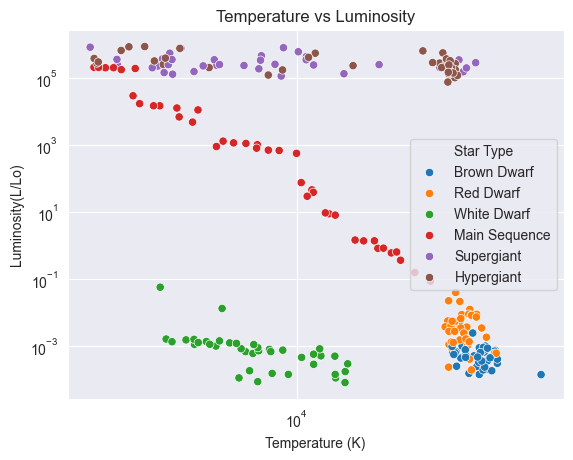

In [11]:
sns.scatterplot(data=dataset, x = "Temperature (K)", y = "Luminosity(L/Lo)", hue="Star Type")
plt.title("Temperature vs Luminosity")
plt.gca().invert_xaxis()
plt.yscale("log")
plt.xscale("log")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

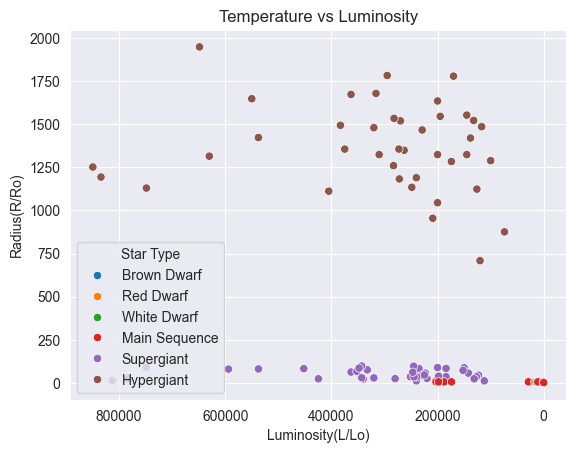

In [12]:
sns.scatterplot(data=dataset, x = "Luminosity(L/Lo)", y = "Radius(R/Ro)", hue="Star Type")
plt.title("Temperature vs Luminosity")
plt.gca().invert_xaxis()
plt.show

In [13]:
cat_cols = []
for col in dataset.columns:
    if dataset[col].dtypes == "object":
        cat_cols.append(col)

for col in cat_cols:
    print(dataset[col].value_counts())
    print("-"*30)

Star color
Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: count, dtype: int64
------------------------------
Spectral Class
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: count, dtype: int64
------------------------------
Star Type
Brown Dwarf      40
Red Dwarf        40
White Dwarf      40
Main Sequence    40
Supergiant       40
Hypergiant       40
Name: count, dtype: int64
------------------------------
